In [150]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

In [151]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HousAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
print(features_idx)
print(X_full[:5])
X = X_full[:, features_idx]
print(X)

[0, 5]
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[[8.3252     2.55555556]
 [8.3014     2.10984183]
 [7.2574     2.80225989]
 ...
 [1.7        2.3256351 ]
 [1.8672     2.12320917]
 [2.3886     2.61698113]]


In [152]:
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(output_distribution="uniform").fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(output_distribution="normal").fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]
# print(X[:5])
# print('normal**'*100)
# print(StandardScaler().fit_transform(X)[:5])
# print('StandardScaler**'*100)
# print(MinMaxScaler().fit_transform(X)[:5])
# print('MinMaxScaler**'*100)
# print(MaxAbsScaler().fit_transform(X)[:5])
# print('MaxAbsScaler**'*100)
# print(RobustScaler(quantile_range=(25, 75)).fit_transform(X)[:5])
# print('RobustScaler**'*100)
# print(PowerTransformer(method="yeo-johnson").fit_transform(X)[:5])
# print('PowerTransformer(yeo-johnson)**'*100)
# print(PowerTransformer(method="box-cox").fit_transform(X)[:5])
# print('PowerTransformer(box-cox)**'*100)
# print(QuantileTransformer(output_distribution="uniform").fit_transform(X)[:5])
# print('QuantileTransformer(uniform)**'*100)
# print(QuantileTransformer(output_distribution="normal").fit_transform(X)[:5])
# print('QuantileTransformer(normal)**'*100)
# print(Normalizer().fit_transform(X)[:5])
# print('Normalizer**'*100)

y = minmax_scale(y_full)

cmap = getattr(cm, "plasma_r", cm.hot_r)

In [153]:
def create_axes(title, figsize=(16,6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7

    rect_scatter = [left, bottom, width, height]
    #1
    ax_scatter = plt.axes(rect_scatter)

    left = width + left + 0.2
    rect_scatter = [left, bottom, width, height]

    #2
    ax_scatter_zoom = plt.axes(rect_scatter)

    ax_colorbar = plt.axes
    
    return (ax_scatter, ax_scatter_zoom, ax_colorbar)

In [154]:
def plot_distribution(axes,X,y):
    colors = cmap(y)
    axes.scatter(X[:,0], X[:,1], c=colors)

In [179]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    print(title, X[:5], X[:,0])
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    array = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        array[0],
        X,
        y
    )    
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)
    print(cutoffs_X0)
    print(cutoffs_X1)
    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )

    plot_distribution(
        array[1],
        X[non_outliers_mask],
        y[non_outliers_mask]
    )  






Unscaled data [[8.3252     2.55555556]
 [8.3014     2.10984183]
 [7.2574     2.80225989]
 [5.6431     2.54794521]
 [3.8462     2.18146718]] [8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]
[ 0.4999  10.59654]
[0.69230769 5.39481203]


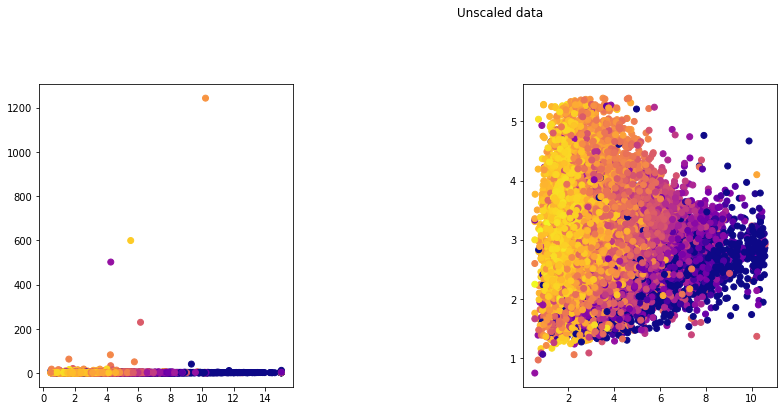

In [177]:
make_plot(0)

Data after standard scaling [[ 2.34476576 -0.04959654]
 [ 2.33223796 -0.09251223]
 [ 1.7826994  -0.02584253]
 [ 0.93296751 -0.0503293 ]
 [-0.012881   -0.08561576]]


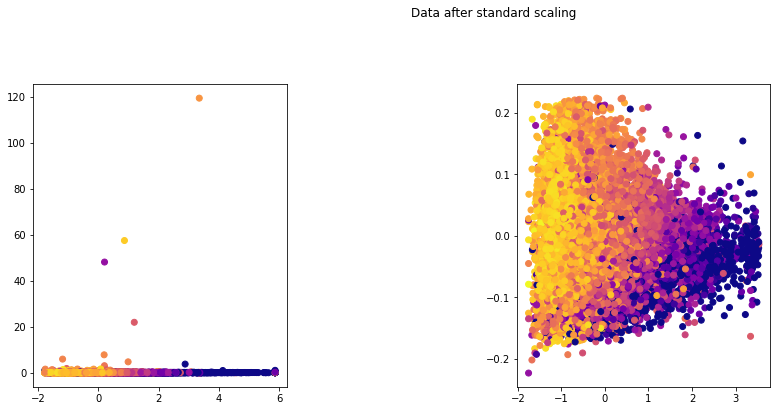

In [157]:
make_plot(1)

Data after min-max scaling [[0.53966842 0.00149943]
 [0.53802706 0.00114074]
 [0.46602805 0.00169796]
 [0.35469856 0.0014933 ]
 [0.23077613 0.00119838]]


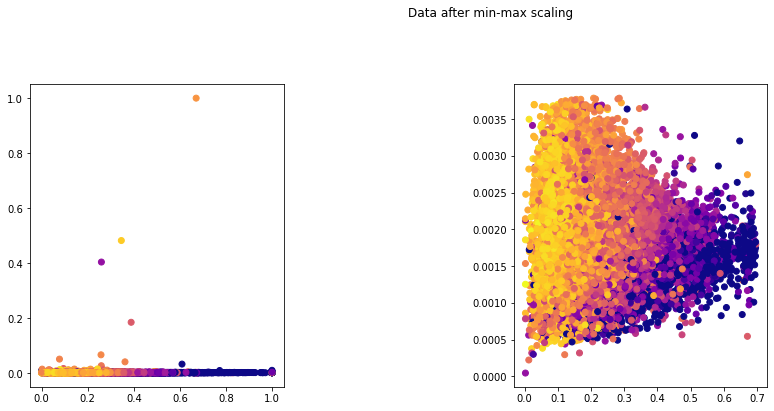

In [158]:
make_plot(2)

Data after max-abs scaling [[0.55500963 0.00205541]
 [0.55342298 0.00169692]
 [0.48382344 0.00225383]
 [0.37620416 0.00204929]
 [0.25641162 0.00175453]]


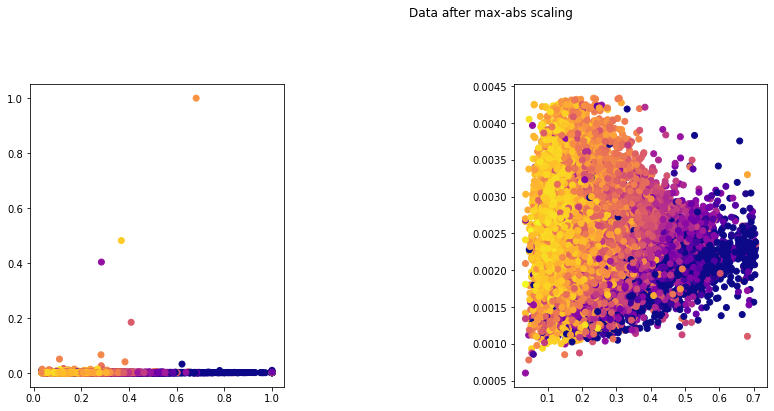

In [159]:
make_plot(3)

Data after robust scaling [[ 2.1975824  -0.30798124]
 [ 2.18666422 -0.83080046]
 [ 1.70773218 -0.01859871]
 [ 0.96717664 -0.31690813]
 [ 0.14285387 -0.7467844 ]]


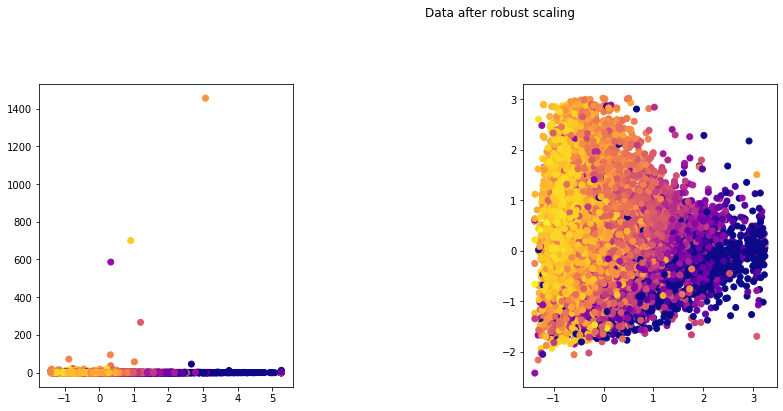

In [160]:
make_plot(4)

Data after power transformation (Yeo-Johnson) [[ 1.90328853 -0.3687632 ]
 [ 1.89708092 -1.18626485]
 [ 1.60436139  0.00505285]
 [ 1.05132056 -0.38107957]
 [ 0.20587759 -1.04022983]]


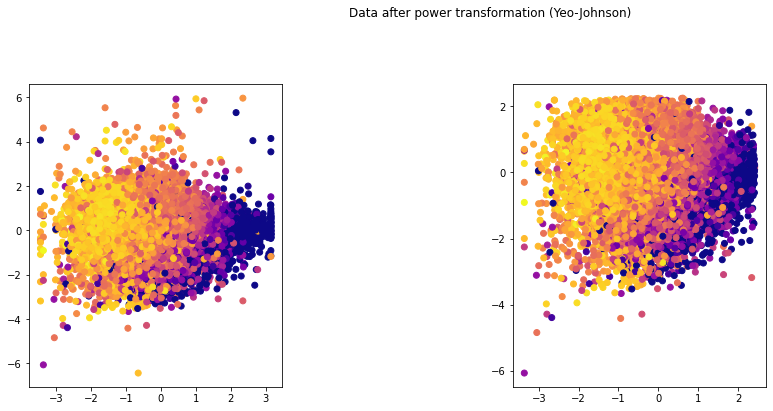

In [161]:
make_plot(5)

Data after power transformation (Box-Cox) [[ 1.91629005 -0.35386161]
 [ 1.90969448 -1.17219792]
 [ 1.60197816  0.01381331]
 [ 1.03596733 -0.36603215]
 [ 0.19802572 -1.02422619]]


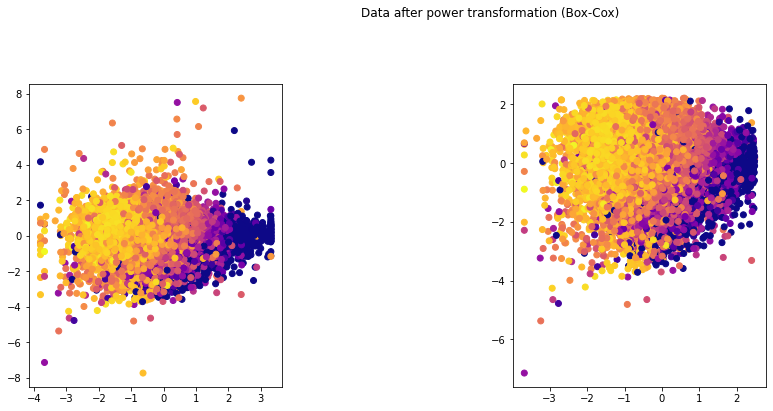

In [162]:
make_plot(6)

Data after quantile transformation (uniform pdf) [[0.97251956 0.32632633]
 [0.9722166  0.10948473]
 [0.9484673  0.48870885]
 [0.86069503 0.32090529]
 [0.5765798  0.13365963]]


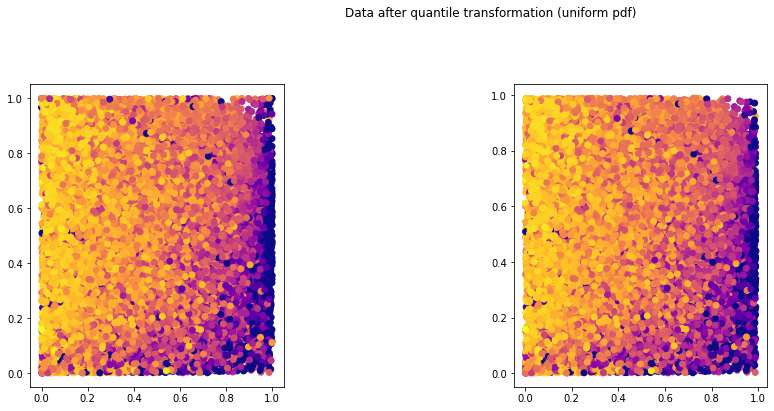

In [163]:
make_plot(7)

Data after quantile transformation (gaussian pdf) [[ 1.9191854  -0.45008015]
 [ 1.91441776 -1.22927299]
 [ 1.63017081 -0.02830649]
 [ 1.0834473  -0.4651688 ]
 [ 0.19315139 -1.10925716]]


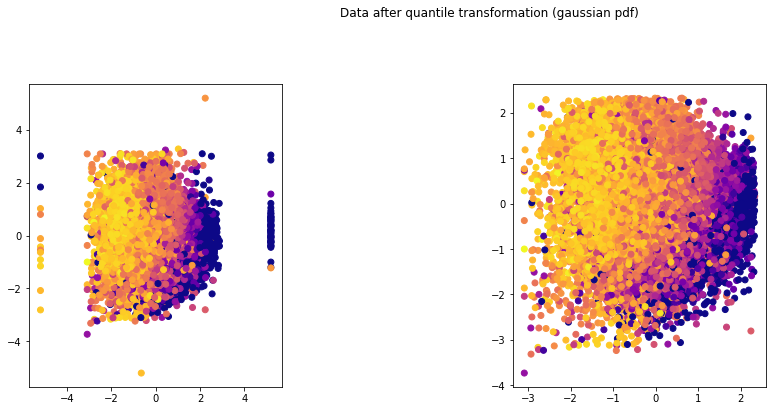

In [164]:
make_plot(8)

Data after sample-wise L2 normalizing [[0.95597389 0.29345174]
 [0.96918759 0.24632381]
 [0.93287311 0.36020516]
 [0.91140401 0.41151273]
 [0.86983259 0.493347  ]]


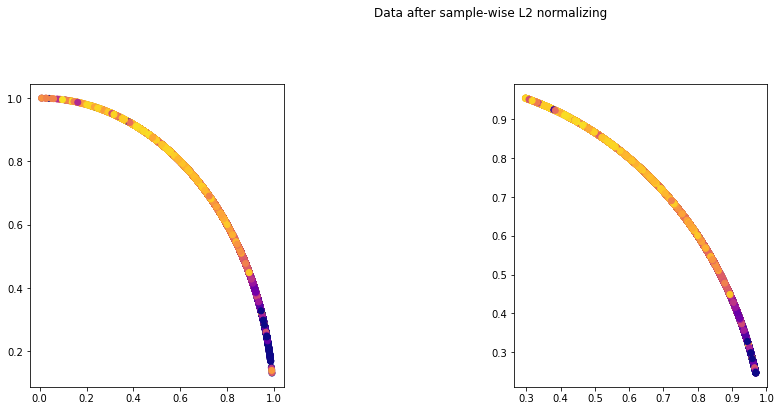

In [165]:
make_plot(9)